# Lecture 4: Introduction to Probability Theory (Part II)

## Objectives

+ To introduce the concept of a probability space.
+ To introduce the concept of discrete random variables.
+ To introduce the probability mass function and the cumulative distribution function.
+ To learn about the expectation and variance of a random variable.
+ To introduce joint probability mass function.
+ To learn how one can condition a random variable on observations of another.
+ To introduce the concept of independent random variables.
+ To learn about some basic discrete random variables.

## Readings

+ These notes.
+ The wikipedia page for the [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution).
+ The wikipedia page for the [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution).
+ The wikipedia page for the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import numpy as np

## Probability spaces

In whatever we write below, everything is conditioned on our current information $I$.
Because this information is always on the background, we will not be explictily showing it in our notation.

Assume that we are doing an experiment.
It doesn't matter what exactly the experiment is.
The result of the experiment depends on the values of some physical variables $\omega$ which may be unknown to us (epistemic uncertainty) or truly random (aleatory uncertainty).
In the language of mathematical probability theory, this $\omega$ is called an **event**.
The space of all possible $\omega$'s, denoted by $\Omega$, is called the **event space**.
For today, assume that $\Omega$ is a discrete space (otherwise things become a little bit more complicated).

Since, we are uncertain about which $\omega$ will appear in nature, we need to assign probabilities over the possible values.
Ideally, what we would like to have is some function $\mathbb{P}(A)$ that takes an arbitrary subset $A$ of $\Omega$ and tells us how probable it is.
That is $\mathbb{P}$ is a function from all subsets of $\Omega$, $\mathcal{F} = \mathcal{P}(\Omega)$, to the real numbers:
$$
\mathbb{P}: \mathcal{F} \rightarrow \mathbb{R},
$$
There are a few things that this function should satisfy for all $A$ in $\mathcal{F}$
+ It should be nonnegative, i.e., $\mathbb{P}(A)\ge 0$.
+ One of the $\omega$'s must happen, $\mathbb{P}(\Omega) = 1$.
+ The obvious rule $\mathbb{P}(A^c) = 1 - \mathbb{P}(A)$, where $A^c = \Omega\setminus A$ is the completement of $A$.
When these properties are satisfied, we say that $\mathbb{P}$ is a probability measure on $\mathcal{F}$.

The triplet $(\Omega, \mathcal{F}, \mathbb{P})$ is called a **probability space**.

Note: If we wanted to show the background information we would be writting $\mathbb{P}[A|I]$.

## The mathematical definition of a random variable

Now assume that we are doing a specific experiment that measures something, say an integer.
Assume that the physical variables that determine what is the result of the experiment are $\omega$ and they take values in a set $\Omega$.
We are uncertain about the $\omega$'s and we have described this uncertainty using a probability measure $\mathbb{P}$ on some subsets $\mathcal{F}$ of $\Omega$.
Call $X$ the result of the experiment.
The graph is as follows:

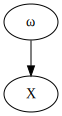

In [2]:
from graphviz import Digraph
g = Digraph('omega_X')
g.node('omega', label='<&omega;>')
g.node('X')
g.edge('omega', 'X')
g.render('omega_X', format='png')
g

This brings us to the mathematical definition of a random variable:

> A random variable is a function of the event space $X(\omega)$.

Note: if the event space is not discrete, we need some more restrictions on these functions.
You need to take a probability theory course to learn about the technical details.

Now, if $X(\omega)$ takes discrete values, like heads or tails, $0, 1, 2$, etc., then we say that $X$ is a discrete random variable.
If $X(\omega)$ takes continuous values, like real numbers, then we say that $X$ is a continuous random variables.
Today, we are only going to work with discrete random variables.

Notation:
+ We will be using upper case letters to represent random variables, like $X, Y, Z$.
+ We will be using lower case letters to represent the values of random variables, like $x, y, z$.

### Example: The random variable corresponding to the result of a coin toss (1/2)

Let's consider again the coin tossing example we introduced in the previous lecture.

![Coin flipping](coin_flipping.png)

Remember that we denoted with $v_0$ and $\omega_0$ the initial velocity and angular velocity of the coin.
Then, we showed that the variable $X$ representing the coin toss can be predicted exactly, if we knew $v_0$ and $\omega_0$.
Specifically, we derived the following relationship between the result of the coin toss and the initial conditions:
$$
X = 
\begin{cases}
T,&\;\text{if}\;\frac{2v_0\omega_0}{g} (\text{mod}\;2\pi) \in \left(\frac{\pi}{2},\frac{3\pi}{2}\right),\\
H,&\;\text{otherwise}.
\end{cases}
$$
Graphically, this relationship can be represented by:

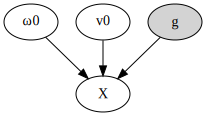

In [3]:
from graphviz import Digraph
gct = Digraph('coin_toss_g')
gct.node('omega0', label='<&omega;<sub>0</sub>>')
gct.node('v0', label='<v<sub>0</sub>>')
gct.node('g', style='filled')
gct.node('X')
gct.edge('g', 'X')
gct.edge('v0', 'X')
gct.edge('omega0', 'X')
gct.render('coin_toss_g', format='png')
gct

Then, we argued that the uncertainty about the value of $X$ is induced by our uncertainty about the values of $v_0$ and $\omega_0$.
It is not the the coin toss is random.
It is described in extreme detail by Newton's laws.
It is that we do not know what the initial conditions are.
So, the state of nature is captured by $(v_0,\omega_0)$.
Notice that essentially the variable $X$ is a function of $(v_0,\omega_0)$.
We can write:
$$
X = X(v_0, \omega_0).
$$
You see that the result of the coin toss $X$ is nothing more but a function of the *true state of nature* $(v_0, \omega_0)$.
It is just that the value of $X$ is uncertain because the state of nature is uncertain.
$X$ is an example of a random variable.

## The probability mass function

Take a discrete random variable $X$ defined on some probability space $(\Omega, \mathcal{F}, \mathbb{P})$.
Without loss of generality, assume that $X$ can potentially take infinite $\mathbb{N} = \{1,2,\dots\}$.
Why is this sufficient?

+ If $X$ takes finite values then we can simply set the probability of values after a given number equal to zero.
+ If the values are of another type (e.g., heads and tails) you can just map them to the natural numbers.

The probability mass function of the random variable $X$, denoted by $f_X(x)$, gives the probability of $X$ taking the value $x$.
Mathematically, it is defined by:
$$
f_X(x) := \mathbb{P}(X=x) = \mathbb{P}\left(\{\omega: X(\omega) = x\}\right).
$$
Notice that we are just gathering in a set all the states of nature $\omega$ that give an experiment with value $x$, $X=k$, and then we find probability of that set.

If you are 100\% sure about which random variable you are talking about,
feel free to use the much simpler notation:
$$
p(x) \equiv p(X=x) \equiv f_X(x) = \mathbb{P}\left(\{\omega: X(\omega) = x\}\right).
$$
This is the notation we will employ from this point on.
We will only use the strict mathematical notation when we have no choice.

Note: If we wanted to show the background information we would be writing $p(x|I)$.

### Properties of the probability mass function

There are some standard properties of the probability mass function that is worth memorizing:

+ The probability mass function is nonnegative:
$$
p(x) \ge 0,
$$
for all $x$ in $\mathbb{N}$.
+ The probability mass function is normalized:
$$
\sum_{x=0}^\infty p(x) = 1.
$$
This is a direct consequence of the fact that $X$ must take a value.
+ Take any set of possible values of $X$, $A$. The probability of $X$ taking values in $A$ is:
$$
p(X\in A) = \sum_{x\in A} p(x).
$$

### Example: The random variable corresponding to the result of a coin toss (2/2)

Let's write down the probability mass function of the coin toss random variable $X$.
Without loss of generality, we can map heads to the number $0$ and tails to the number $1$.
We need to specify the probability of one of these events, as the probability of the other one is trivially defined.
For a fair coin we have:
$$
p(X=0) = \text{probability of heads} = \frac{1}{2}.
$$
From this, because of the normalization constraint:
$$
p(X=0) + p(X=1) = 1,
$$
we get that:
$$
p(X=1) = \frac{1}{2}.
$$
This is an example of a special random variable taking two discrete values $0$ and $1$, which we call the Bernoulli random variable.
We will see it in an example later on.

## Functions of discrete random variables

Consider a random variable $X$ taking values in $\mathbb{N}$ with probability mass function $p(x)$.
Now, consider a function $g(x)$.
We can now define a new random variable:
$$
Y = g(X).
$$
The this random variable takes values in:
$$
g(\mathbb{N}) := \{g(x): x \in \mathbb{N}\}.
$$
It has its own probability mass function (pmf) which we can define using the pmf of $X$:
$$
p(y) = p(Y = y) = p(X\in g^{-1}(y)) = \sum_{x\in g^{-1}(y)} p(x),
$$
where $g^{-1}(y)$ is the set of $x$'s that map to $y$ through $g$, i.e.,
$$
g^{-1}(y) := \{x\in\mathbb{N}: g(x) = y\}.
$$

This is formal definition of the uncertainty propagation problem.
The correspondenc is that $X$ represents the parameters of a physical model, and $Y = g(X)$ is the uncertain result of the physical model.

## Expectation of random variables

The expectation of a random variable is defined to be:
$$
\mathbb{E}[X] = \sum_{x=0}^\infty x p(x).
$$
You can think of the expectation as the value of the random variable that one should "expect" to get.
However, take this interpretation with a grain of salt because it may be a value that the random variable has a zero probability of getting...

### Example: Expectation of a coin toss
The expectation of the coin toss random variable is:
$$
\mathbb{E}[X] = 0\cdot p(X=0) + 1\cdot p(X=1) = 0.5.
$$
Of course, this is not a value that the random variable can get.

### Properties of the expectation
Here are some properties of the expectation.
The proof of some of these properties will be given as homework.
+ Take any constant $c$. Then we have:
$$
\mathbb{E}[X + c] = \mathbb{E}[X] + c.
$$
+ For any $\lambda$ real number, we also have:
$$
\mathbb{E}[\lambda X] = \lambda \mathbb{E}[X].
$$
+ Take two random variables $X$ and $Y$. Then we have:
$$
\mathbb{E}[X + Y] = \mathbb{E}[X] + \mathbb{E}[Y].
$$
+ Now consider any function $g(x)$.
We can now define the expectation of $g(X)$ as the expectation of the random variable $Y = g(X)$.
It is quite easy to show that:
$$
\mathbb{E}[g(X)] = \sum_{x=0}^\infty g(x) p(x).
$$
+ Assume that $g(x)$ is a convex function, then:
$$
g\left(\mathbb{E}[X]\right) \le \mathbb{E}[g(X)].
$$
This is known as Jensen's inequality.

## Variance of random variables

The variance of a random variable $X$ is defined as the expectation of the square deviation from its expectation, i.e.:
$$
\mathbb{V}[X] := \mathbb{E}\left[(X - \mathbb{E}[X])^2\right].
$$
You can think of the variance as the spread of the random variable around its expectation.
However, do not take this too literally for discrete random variables.

### Example: Variance of a coin toss
Let's calculate the variance of the coin toss.
We need:
$$
\mathbb{E}\left[X^2\right] = 0^2\cdot p(X=0) + 1^2 \cdot p(X=1) = 0.5.
$$
So, using the formula above we get:
$$
\mathbb{V}[X] = \mathbb{E}\left[X^2\right] - \left(\mathbb{E}[X]\right)^2 = 0.5 - (0.5)^2 = 0.5 - 0.25 = 0.25.
$$

### Properties of the variance
Here are some properties of the variance.
+ It holds that:
$$
\mathbb{V}[X] = \mathbb{E}\left[X^2\right] - \left(\mathbb{E}[X]\right)^2.
$$
+ For any constant $c$, we have:
$$
\mathbb{V}[X + c] = \mathbb{V}[X].
$$
+ For any constant $c$, we have:
$$
\mathbb{V}[cX] = c^2\mathbb{V}[X].
$$

## Example: The Bernoulli random variable (1/2)

Bernoulli random variable generalizes the concept of a coin toss.
You can think of it as the result of an experiment with two possible outcomes $0$ and $1$.
One just needs to specify the probability of one of the outcomes, typically the probability of zero.
So, how do we denote mathematically a Bernoulli random variable $X$ that takes the value $1$ with probability $\theta$ in $[0,1]$?
We can write:
$$
X = \begin{cases} 1,\;\text{with probability}\;\theta,\\
0,\;\text{otherwise}.
\end{cases}
$$
Notice that in defining this random variable we are ignoring the mechanism that is giving rise to it.
This is ok. It just means that we have decided to not look into it.
The other way we can write this is as follows:
$$
X \sim \operatorname{Bernoulli}(\theta).
$$
Let's use the functionality of ``scipy.stats`` to define a Bernoulli random variable and sample from it.

The expectation of the Bernoulli is:
$$
\mathbb{E}[X] = \sum_x x p(X=x) = 0\cdot (1-\theta) + 1\cdot \theta = \theta.
$$
Similarly, the variance of the Bernoulli is:
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \left(\mathbb{E}[X]\right)^2 = \theta - \theta^2 = \theta(1-\theta).
$$

In [4]:
# Import the scipy.stats library
import scipy.stats as st
# This is the probability of 1:
theta = 0.6
# Define the random variable, Bernoulli(theta)
X = st.bernoulli(theta)

In [5]:
# Here is the **support** of the random variable. It tells you which variables it takes:
print('X takes values in', X.support())

X takes values in (0, 1)


In [6]:
# Evaluate the probability mass function at every point of the support
for x in X.support():
    print('p(X={0:d}) = {1:1.2f}'.format(x, X.pmf(x)))

p(X=0) = 0.40
p(X=1) = 0.60


In [7]:
# Evaluate the cumulative distribution function at every point of the support
for x in X.support():
    print('p(X={0:d}) = {1:1.2f}'.format(x, X.cdf(x)))

p(X=0) = 0.40
p(X=1) = 1.00


In [8]:
# Sample the random variable 100 times:
xs = X.rvs(100)
print(xs)

[1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1
 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1
 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1]


In [9]:
# The expectation of the Bernoulli:
print('E[X] = {0:1.2f}'.format(X.expect()))

E[X] = 0.60


In [10]:
# The variance of the Bernoulli:
print('V[X] = {0:1.2f}'.format(X.var()))

V[X] = 0.24


### Questions

+ Rerun the code above for $\theta = 0.8$.
+ Verify using your calculation that ``scipy.stats`` is giving the correct expectation and variance.
+ Plot the histogram of 1000 random samples from $X$.

## Joint probability mass function of random variables

Consider two random variables $X$ and $Y$.
The *joint probability mass function* of the pair $(X,Y)$ is the function $f_{X,Y}(x,y)$ giving the probability that $X=x$ and $Y=y$.
Mathematically (and introducing a simplified notation), we have:
$$
p(x,y) \equiv p(X=x, Y=y) \equiv f_{X,Y}(x,y) := \mathbb{P}\left(\{\omega: X(\omega) = x, Y(\omega)=y\}\right).
$$

### Properties of the joint probability mass function
+ It is nonnegative:
$$
p(x,y) \ge 0.
$$
+ If you sum over all the possible values of all random variables, you should get one:
$$
\sum_x \sum_y p(x,y) = 1.
$$
+ If you *marginalize* over the values of one of the random variables you get the pmf of the other.
For example:
$$
p(x) = \sum_y p(x,y),
$$
and 
$$
p(y) = \sum_x p(x, y).
$$

### The covariance operator

The covariance operator measures how correlated two random variables $X$ and $Y$ are.
Its definition is:
$$
\mathbb{C}[X,Y] = \mathbb{E}\left[\left(X-\mathbb{E}[X]\right)\left(Y-\mathbb{E}[Y]\right)\right].
$$
If $\mathbb{C}[X,Y]$ is positive, then we say that the two random variables are correlated.
If it is negative, then we say that the two random variables are anti-correlated.
If it is zero, then we say that the two random variables are not correlated.
We will talk more about this in a later lecture.

A usefull property of the covariance operator is that it can give tell you something about the variance of the sum of two random variables.
It is:
$$
\mathbb{V}[X + Y] = \mathbb{V}[X] + \mathbb{V}[Y] + 2\mathbb{C}[X,Y].
$$

### Joint probability mass function of many random variables
Take $N$ random variables $X_1,\dots,X_N$.
We can define their joint probability mass function in the same way we did it for two:
$$
p(x_1,\dots,x_N) \equiv p(X_1=x_1,\dots,X_N=x_N) \equiv f_{X_1,\dots,X_N}(x_1,\dots,X_N) := \mathbb{P}\left(\{\omega: X_1(\omega)=x_1,\dots,X_N(\omega)=x_N\}\right).
$$
Just like before, we can marginalize over any subset of random variables to get the pmf of the remaining ones.
For example:
$$
p(x_i) = \sum_{x_j,j\not=i} p(x_1,\dots,x_N).
$$

## Conditioning a random variables on the values of another

Take two random variables $X$ and $Y$ with joint pmf $p(x,y)$.
Suppose that you observe $Y=y$ and you want to update your state of knowledge about the probability that $X=x$, i.e., you want to get the *conditional pmf* $p(x|y)$.
Of course, this is done using Bayes' rule:
$$
p(x|y) = \frac{p(x,y)}{p(y)}.
$$

### Example: Drawing balls from a box without replacement

Consider the following information I:

> We are given a box with 10 balls 6 of which are red and 4 of which are blue. The box is sufficiently mixed so that when we get a ball from it, we don't know which one we pick. When we take a ball out of the box, we do not put it back.

Now, assume that we represent red balls with a $0$ and blue balls with $1$.
Let $X$ be the random variable corresponding to the outcome of the first draw and $Y$ the random variable corresponding to the outcome of the second draw.
In this problem, it is not easy to find the joint pmf $p(x,y)$ directly.
It is actually easier to first find $p(x)$, then $p(y|x)$ and finally reconstruct $p(x,y)$ using Bayes' rule.
Let's do it.

We showed in the previous lecture that:
$$
p(X=0) = \frac{6}{10} = \frac{3}{5},
$$
and
$$
p(X=1) = 1 - p(X=0) = \frac{2}{5}.
$$

We also have:
$$
p(Y=0|X=0) = \frac{5}{9},
$$
since if we draw a red first, $X=0$, there remain $9$ balls $5$ of which are red.
$$
p(Y=0|X=1) = \frac{6}{9} = \frac{2}{3},
$$
since if we draw a blue first, $X=1$, there remain $9$ balls $6$ of which are red.
$$
p(Y=1|X=0) = 1 - p(Y=0|X=0) = \frac{4}{9},
$$
and
$$
p(Y=1|X=1) = 1 - p(Y=0|X=1) = \frac{1}{3}.
$$

From Bayes' rule we have:
$$
p(x,y) = p(x)p(y|x),
$$
and we can completly tabulate this joint pmf:
$$
\begin{split}
p(X=0, Y=0) &= p(X=0)p(Y=0|X=0) = \frac{3}{5}\cdot \frac{5}{9} \approx 0.33\\
p(X=0, Y=1) &= p(X=0)p(Y=1|X=0) = \frac{3}{5}\cdot \frac{4}{9} \approx 0.27\\
p(X=1, Y=0) &= p(X=1)p(Y=0|X=1) = \frac{2}{5}\cdot \frac{2}{3} \approx 0.27\\
p(X=1, Y=1) &= p(X=1)p(Y=1|X=1) = \frac{2}{5}\cdot \frac{1}{3} \approx 0.33.
\end{split}
$$
Notice that these sum to one.

Finally, by marginalizing over $x$, we can find the pmf of $Y$:
$$
\begin{split}
p(Y=0) &= \sum_x p(X=x,Y=0) = p(X=0, Y=0) + p(X=1, Y=0) \approx 0.33 + 0.27 = 0.5\\
p(Y=1) &= \sum_x p(X=x,Y=1) = p(X=0, Y=1) + p(X=1, Y=1) \approx 0.27 + 0.33 = 0.5. 
\end{split}
$$

Let's find the covariance of the two random variables.
We need:
$$
\begin{split}
\mathbb{E}[X] &= 0\cdot p(X=0) + 1\cdot p(X=1) = 0.4,\\
\mathbb{E}[Y] &= 0\cdot p(Y=0) + 1\cdot p(Y=1) = 0.5.
\end{split}
$$
The covariance is:
$$
\begin{split}
\mathbb{C}[X,Y] &= \mathbb{E}\left[\left(X-\mathbb{E}[X]\right)\left(Y-\mathbb{E}[Y]\right)\right]\\
&= \sum_{x,y} p(X=x,Y=y)\left(x-0.4\right)(y-0.5)\\
&\approx 0.33\cdot (0.2) + 0.27 \cdot (-0.2) + 0.27 \cdot (-0.3) + 0.33 \cdot (0.3)\\
&= 0.03.
\end{split}
$$

## Independent random variables

Take two random variables $X$ and $Y$.
We say that the two random variables are independent given the background information $I$, and we write:
$$
X\perp Y | I,
$$
if and only if conditioning on one does not tell you anything about the other, i.e.,
$$
p(x|y, I) = p(x|I).
$$
It is easy to show using Bayes' rule that the definition is consistent, i.e., you also get:
$$
p(y|x, I) = p(y|I).
$$
When there is no ambiguity, we can drop $I$.

### Properties of independent random variables
+ The joint pmf factorizes:
$$
p(x,y) = p(x)p(y).
$$
+ The expectation of the product is the product of the expectation:
$$
\mathbb{E}[XY] = \mathbb{E}[X]\cdot \mathbb{E}[Y].
$$
+ The covariance of two independent random variables is zero:
$$
\mathbb{C}[X,Y] = 0.
$$
Be careful **the reverse is not true!**
+ A consequence of the above property is that the variance of the sum of two independent random variables is the sum of the variables:
$$
\mathbb{V}[X+Y] = \mathbb{V}[X] + \mathbb{V}[Y].
$$

## Example: The binomial distribution

Suppose that you tossing $n$ times a coin with probability of heads $\theta$ and let $X$ be the number of heads.
The random variable $X$ is called the binomial random variable.
We write:
$$
X\sim B(n, \theta).
$$
It is easy to show that its pmf is:
$$
p(X = k) = {n\choose{k}}\theta^k(1-\theta)^{n-k},
$$
where ${n\choose{k}}$ is the number of $k$ combinations out of $n$ elements:
$$
{n\choose{k}} = \frac{n!}{k!(n-k)!}.
$$
The expectation of the binomial is:
$$
\mathbb{E}[X] = \sum_{k=0}^n p(X=k) = \sum_{k=0}^n{n\choose{k}}\theta^k(1-\theta)^{n-k} = ?.
$$
It does seem very easy to carry out this sum.
However, you can do something smarter.
Notice that $X$ counts the number of heads in $n$ independent trials.
Let's introduce the *independent* random variables $X_1,\dots,X_n$ corresponding to the result of these trials.
All these varaibles are:
$$
X_i \sim \operatorname{Bernoulli}(\theta).
$$
The number of heads is simply:
$$
X = X_1 + \dots X_n.
$$
Since all the random variables on the right hand-side are independent, we get:
$$
\mathbb{E}[X] = \mathbb{E}[X_1] + \dots + \mathbb{E}[X_n] = \theta + \dots + \theta = n\theta.
$$
Similarly, we can find the variance of $X$:
$$
\mathbb{V}{[X]} = \mathbb{V}[X_1] + \dots + \mathbb{V}[X_n] = n \theta (1-\theta).
$$

In [11]:
# Let's draw histograms of the binomial
n = 5
theta = 0.6
X = st.binom(n, theta)
# Here are some samples
print(X.rvs(100))

[4 2 5 3 2 2 2 2 4 4 2 4 4 4 3 3 2 4 2 3 2 3 4 3 3 3 2 3 3 2 2 2 1 5 2 2 4
 3 1 3 3 4 3 4 4 3 4 3 4 3 4 2 2 4 4 5 3 2 4 5 4 1 3 3 4 4 1 3 3 3 4 3 3 3
 2 3 2 2 3 5 2 3 2 4 5 4 2 5 4 3 2 4 0 3 3 3 4 4 4 4]


In [12]:
# Here is the expectation
print('E[X] = {0:1.2f}'.format(X.expect()))

E[X] = 3.00


In [13]:
# Here is the variance
print('V[X] = {0:1.2f}'.format(X.var()))

V[X] = 1.20


Text(0, 0.5, '$p(x)$')

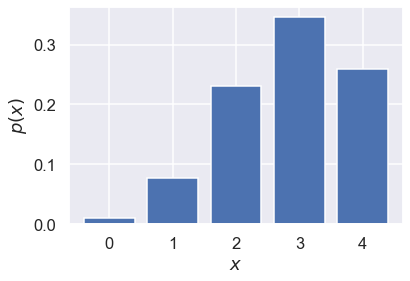

In [14]:
# Let's draw the pmf
fig, ax = plt.subplots()
xs = range(n)
ax.bar(xs, X.pmf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

### Questions

+ Start increasing the number of trials $n$. How does the resulting pmf look like?
This starts to look like a bell curve. And indeed it is!

## Example: The categorical distribution

This is a generalization of the Bernoulli also known as *multinulli*.
It is the probability distribution assigned to a random variable taking $K$ different values each one with a given, but different, probability.
It is:
$$
p(X=k) = p_k.
$$
For example, if all the different values are equally probably, then we could have:
$$
p(X=k) = \frac{1}{K}.
$$
Let's see how we can sample from it.

In [15]:
# Just pick some probabilities
ps = [0.1, 0.3, 0.4, 0.2] # this has to sum to 1
# And here are the corresponding values
xs = [0, 1, 2, 3]
# Here is how you can define a categorical rv:
X = st.rv_discrete(name='Custom Categorical', values=(xs, ps))

In [16]:
print(X.rvs(size=10))

[2 0 1 1 2 3 2 1 1 1]


In [17]:
# You can get the pmf:
print(X.pmf(2))

0.4


## Example: The Poisson distribution

The Poisson distribution models the number of times an event occurs in an interval of space or time.
For example, a Poisson random variable $X$ may be:

+ The number earthquakes greater than 6 Richter occuring over the next 100 years.
+ The number of major floods over the next 100 years.
+ The number of patients arriving at the emergency room during the night shift.
+ The number of electrons hitting a detector in a specific time interval.

The Poisson is a good model when the following assumptions are true:
+ The number of times an event occurs in an interval takes values $0,1,2,\dots$.
+ Events occur independently.
+ The probability that an event occurs is constant per unit of time.
+ The average rate at which events occur is constant.
+ Events cannot occur at the same time.

When these assumptions are valid, we can write:
$$
X\sim \operatorname{Pois}(\lambda),
$$
where $\lambda>0$ is the rate with each the events occur.
The pmf of the Poisson is:
$$
p(X=k) = \frac{\lambda^ke^{-\lambda}}{k!}.
$$
The expectation of the Poisson is:
$$
\mathbb{E}[X] = \sum_{k=0}^\infty k p(X=k) = \lambda.
$$
The variance is:
$$
\mathbb{V}[X] = \dots = \lambda.
$$

Let's look at a specific example.
Historical data show that at a given region a major earthquake occurs once every 100 years on average.
What is the probability that $k$ such earthquakes will occur within the next 100 years.
Let $X$ be the random variable corresponding to the number of earthquakes over the next 100 years.
Assuming the Poisson model is valid, the rate parameter is $\lambda = 1$ and we have:
$$
X\sim \operatorname{Pois}(1).
$$
The probabilities are:

Text(0, 0.5, 'Probability of occurance')

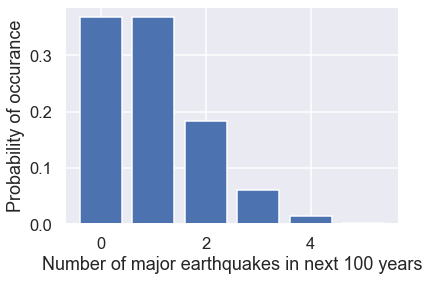

In [18]:
X = st.poisson(1.0)
ks = range(6)
fig, ax = plt.subplots()
ax.bar(ks, X.pmf(ks))
ax.set_xlabel('Number of major earthquakes in next 100 years')
ax.set_ylabel('Probability of occurance')

### Questions

+ How would the rate parameter $\lambda$ change if the rate with each major earthquakes occured in the past was 2 every 100 years?